Members: 
- Manuela 
- Lucresse
- Likhita
- Gil-Allen
- Regis
- Lionel

# CLUSTERING 

Goal : Identify groups of customers to know which strategy in marketing should us apply to target them

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage

The data is represented as follows

![Screenshot 2024-03-04 140500.png](<attachment:Screenshot 2024-03-04 140500.png>)
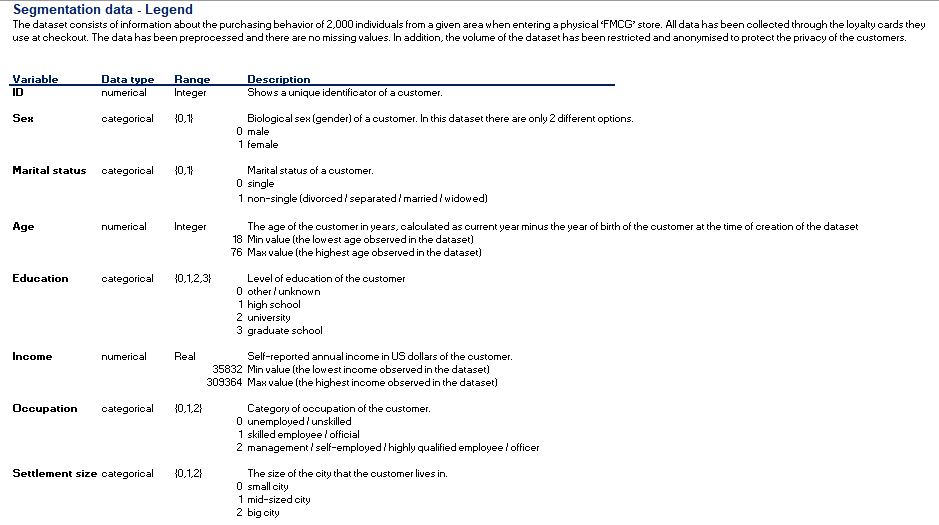

# DATA EXPLORATION

In [2]:
data = pd.read_csv('segmentation data.csv')
data.head(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
data.isna().sum().sum()

0

In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [6]:
data = data.drop(columns='ID')
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Observations:

For continuous variables:

-Average Age = 35.90 years

-Average Income = 120.95K

For categorical variable - obsevation an only be made where there are only 2 categories in terms of proportions

-Sex - Proportion of females in the dataset is 45.70%

-Marital Status - Proportion of non-singles in the dataset is 49.65%

Text(0.5, 1.0, 'Correlation Plot')

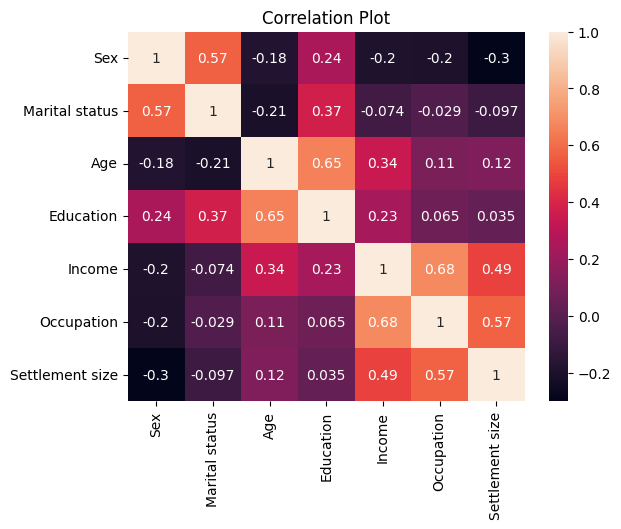

In [7]:
ax = sns.heatmap(data.corr(), annot = True)
ax.set_title('Correlation Plot')

Observations about correlation matrix:

 -Elder people use to have a better education

 -Better occupations earns more money

 -Better income is related to settlement size

 -Elder people use to earn more money

 -Better occupations are in big cities

 -Female gender use to be non-single



  # DATA VISUALISATION

Text(0.5, 1.0, 'Sex Distribution')

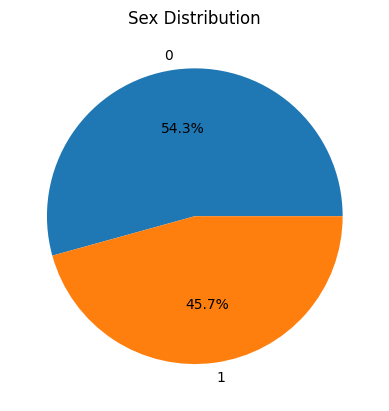

In [8]:
gender= data['Sex'].value_counts()
plt.pie(gender, labels=gender.index, autopct='%1.1f%%')
plt.title("Sex Distribution")

<Figure size 1200x800 with 0 Axes>

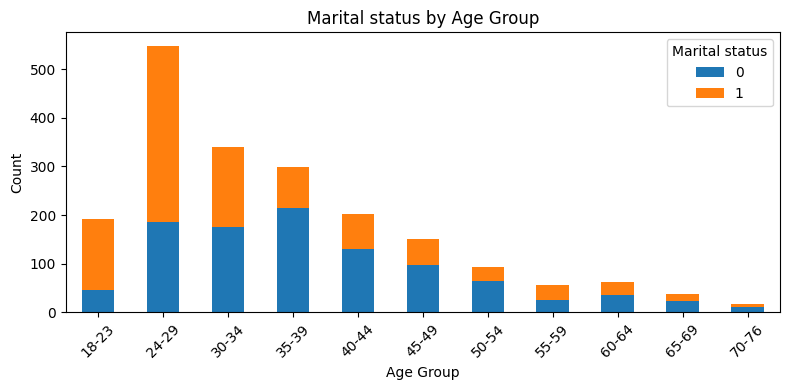

In [9]:
Agebins = [18, 24, 30, 35, 40, 45, 50, 55, 60, 65, 70, 76]
Agelabels = ['18-23', '24-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-76']

data['age_group'] = pd.cut(data['Age'], bins=Agebins, labels=Agelabels, right=False)

plt.figure(figsize=(12, 8))

pivot_df = data.pivot_table(index='age_group', columns='Marital status', aggfunc='size', fill_value=0)
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 4))

plt.title('Marital status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Marital status')
plt.xticks(rotation=45)

plt.tight_layout()


0=Single 1=Non-single

Insight:Customers aged 24-29 are most represented in the dataset and there are more non- single customers in the younger aged group. this gradually decreases as the age group increases.

Text(0.5, 1.0, 'Age vs Income trend')

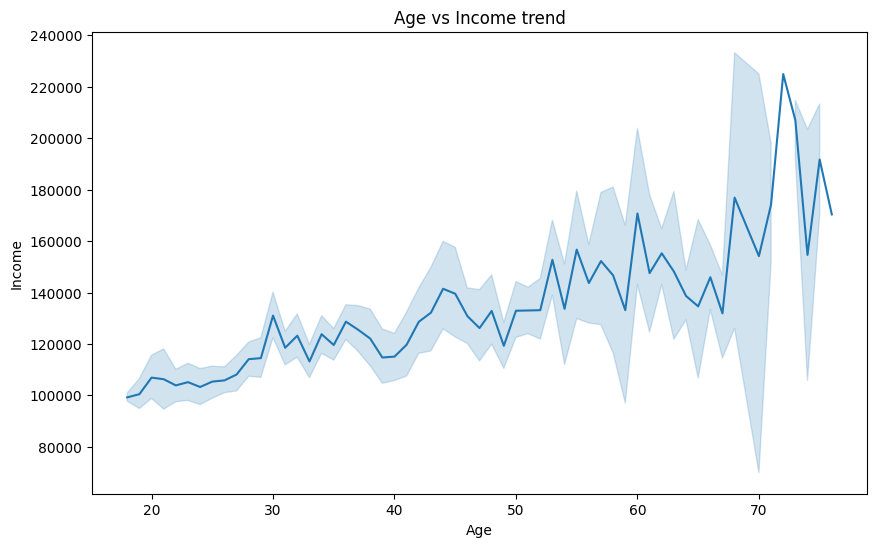

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data['Age'], y=data['Income'])
plt.title("Age vs Income trend")

There is a progressive trend between age and income. it is seen that income increases as age increases.

In [11]:
data = data.drop(columns = 'age_group')
data.head(2)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2


# DATA PREPROCESSING

In [12]:
scaler = StandardScaler()
data_norm = scaler.fit_transform(data)
data_norm = pd.DataFrame(data_norm, columns=data.columns)
X_sc = data_norm
data_norm.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


# MODEL

In [13]:
clusters = range(1,20)
inertias = []
for n in clusters:
    kmeans = KMeans(n_init = 1, n_clusters = n)
    fitted_model = kmeans.fit(data_norm)
    inertias.append(fitted_model.inertia_)

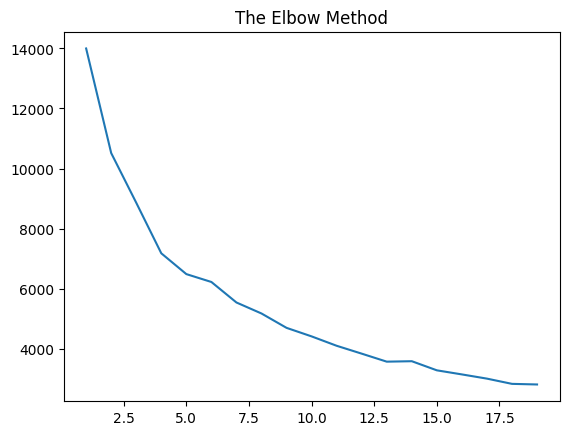

In [14]:
ax = sns.lineplot(x = range(1,20), y = inertias)
ax.set_title('The Elbow Method')
plt.show()

According to the elbow method we can assume 5 clusters for our data

In [15]:
SEED = np.random.seed(300)
kmeans = KMeans(n_clusters = 5, random_state=SEED)
labels = kmeans.fit_predict(data_norm)
data_norm['cluster'] = labels

<Axes: xlabel='Age', ylabel='Income'>

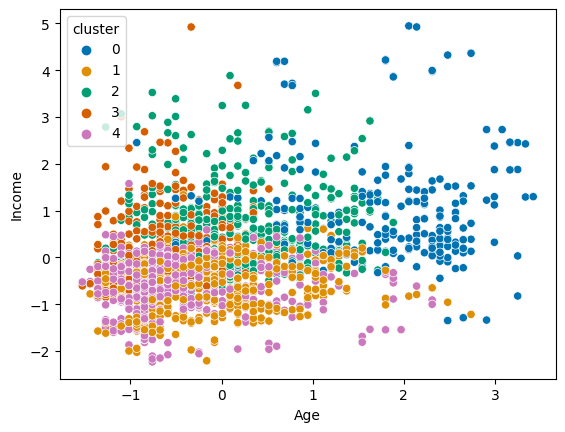

In [16]:
sns.scatterplot(data = data_norm, x = 'Age', y = 'Income', hue = 'cluster', palette='colorblind')

# IMPROVEMENT OF THE MODEL

In [17]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_norm, data_norm.cluster)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3298400219470766


The silhouette score ranges from -1 to 1.

A higher silhouette score indicates better-defined clusters.


Evaluate the score based on the following guidelines:

0.71 - 1.0: Excellent clustering.

0.51 - 0.70: Reasonable clustering.

0.26 - 0.50: Poor clustering.

Less than 0.25: Very poor clustering

Let's try different numbers of clusters

Size of cluster = 3

In [18]:
SEED = np.random.seed(300)
data_norm.drop(columns = 'cluster')
kmeans = KMeans(n_clusters = 3, random_state = SEED)
labels = kmeans.fit_predict(data_norm)
data_norm['cluster'] = labels
silhouette_avg = silhouette_score(data_norm, data_norm.cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.33154992458592597


Size of cluster = 4

In [19]:
SEED = np.random.seed(300)
data_norm.drop(columns = 'cluster')
kmeans = KMeans(n_clusters = 4, random_state = SEED)
labels = kmeans.fit_predict(data_norm)
data_norm['cluster'] = labels
silhouette_avg = silhouette_score(data_norm, data_norm.cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3432918071740163


Size of cluster = 6

In [20]:
SEED = np.random.seed(300)
data_norm.drop(columns = 'cluster')
kmeans = KMeans(n_clusters = 6, random_state = SEED)
labels = kmeans.fit_predict(data_norm)
data_norm['cluster'] = labels
silhouette_avg = silhouette_score(data_norm, data_norm.cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3845628161129802


We can conclude that the best number of clusters was 6 according to silhouette score.

<Axes: xlabel='Age', ylabel='Income'>

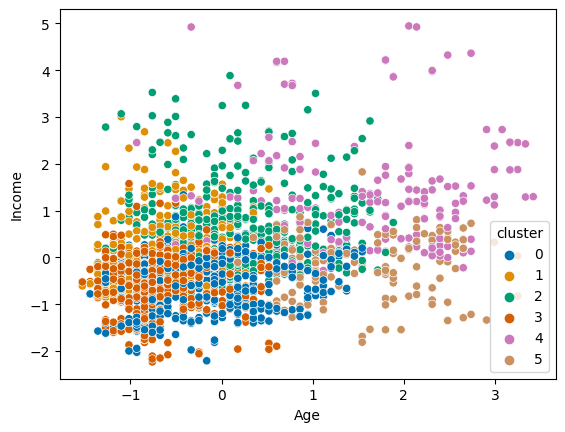

In [21]:
sns.scatterplot(data = data_norm, x = 'Age', y = 'Income', hue = 'cluster', palette='colorblind')

# Analysis per Cluster

In [22]:
df = data.merge(data_norm['cluster'], right_index=True, left_index = True)

Text(0.5, 1.0, 'Income per cluster')

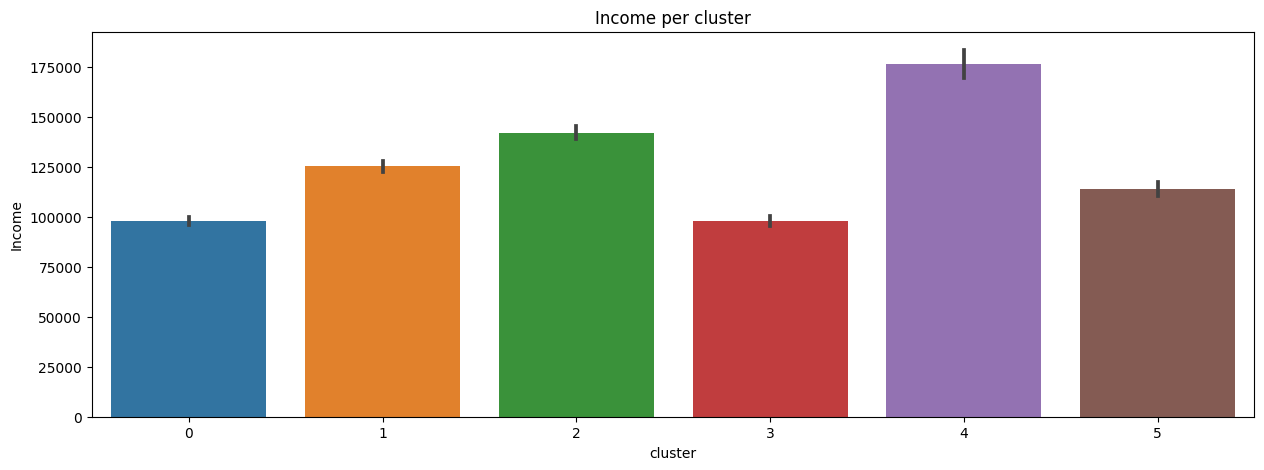

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(df, x = 'cluster', y = 'Income')
plt.title('Income per cluster')

The cluster 4 has the best income

Text(0.5, 1.0, 'Education level per cluster')

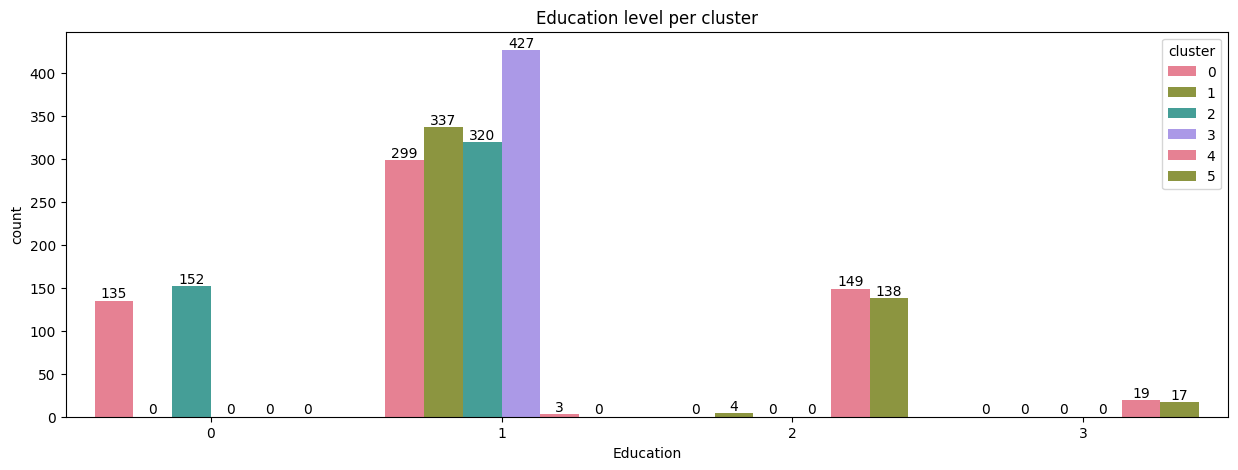

In [24]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df, x = 'Education', hue = 'cluster', palette = sns.color_palette('husl', 4))
for i in range(0, 6):
    ax.bar_label(ax.containers[i])
plt.title('Education level per cluster')

Cluster 5 has more people with high school.

Text(0.5, 1.0, 'Age per cluster')

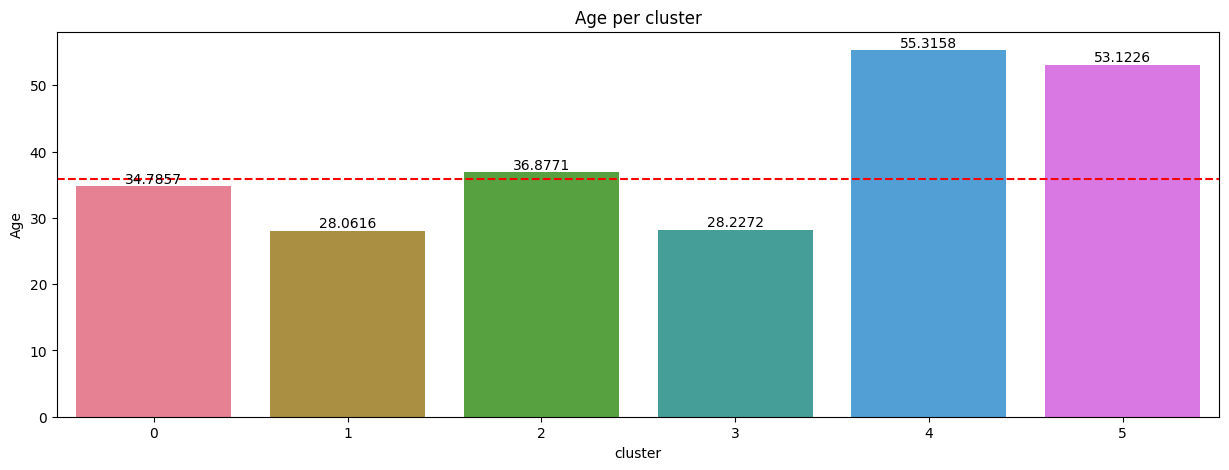

In [25]:
plt.figure(figsize=(15,5))
ax = sns.barplot(df, x = 'cluster', y = 'Age', palette = sns.color_palette('husl', 6), ci = None)
for i in range(0, 1):
    ax.bar_label(ax.containers[i])
plt.axhline(df['Age'].mean(), 0,6, linestyle = '--', color = 'red')
plt.title('Age per cluster')

Cluster 1 are the youngest cluster.

Cluster 4 are the eldest cluster.

Clusters 2 and 5 are higher than average age.

# SUMMARY FOR EACH CLUSTER

In [26]:
df.groupby('cluster').agg({'Sex':pd.Series.mode,
                           'Marital status':pd.Series.mode,
                           'Age':'mean','Education':pd.Series.mode,
                           'Income':'mean','Occupation':pd.Series.mode,
                          'Settlement size':pd.Series.mode})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster,,,,,,,
0,0,0,34.785714,1,97924.500000,0,0
1,1,1,28.061584,1,125184.451613,1,1
2,0,0,36.877119,1,141980.233051,1,2
3,1,1,28.227166,1,98016.922717,0,0
4,0,1,55.315789,2,176590.350877,1,2
5,1,1,53.122581,2,113915.232258,0,0


To go deeper in our analysis, we can try to use PCA before doing our clustering

# PCA

In [27]:
from sklearn.decomposition import PCA
X_sc = X_sc.drop(columns = 'cluster')
pca = PCA().fit(X_sc)

In [28]:
# Principal components coefficients (depending on original features)
pca_components = pd.DataFrame(pca.components_,
                      index=['PC'+str(i+1) for i in range(data.shape[1])],
                      columns=data.columns).T
pca_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Sex,-0.314695,0.458006,-0.293013,-0.315601,-0.707185,-0.051119,-0.054893
Marital status,-0.191704,0.512635,-0.441977,0.280454,0.497560,0.125517,-0.403901
Age,0.326100,0.312208,0.609544,-0.009506,-0.135160,-0.099586,-0.629576
Education,0.156841,0.639807,0.275605,0.181476,0.106597,-0.114333,0.657816
Income,0.524525,0.124683,-0.165662,-0.482600,0.078890,0.662812,0.058633
Occupation,0.492059,0.014658,-0.395505,-0.281690,0.133942,-0.709121,-0.033115
Settlement size,0.464789,-0.069632,-0.295685,0.690265,-0.445565,0.128339,-0.015129


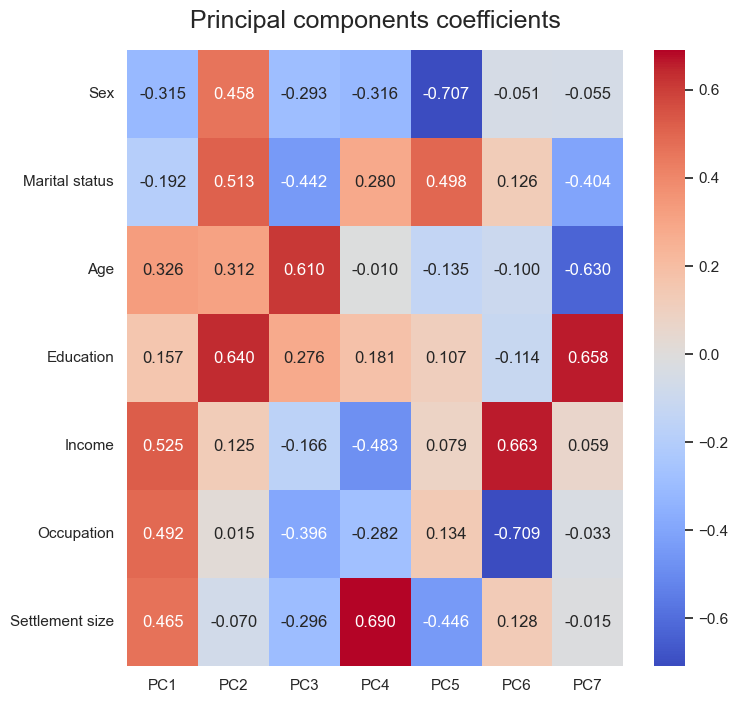

In [29]:
import seaborn as sns
sns.set(rc={"figure.figsize":(8, 8)}) #width=3, #height=4

heatmap=sns.heatmap(pca_components,annot=True, fmt=".3f", cmap='coolwarm')
heatmap.set_title('Principal components coefficients', fontdict={'fontsize':18}, pad=16);

In [30]:
# Projecting X on principal components
X_pca = pca.transform(X_sc)
pca.explained_variance_ratio_*100   #degree of importance of each pca

array([35.69632775, 26.25092321, 18.8211143 ,  7.55774983,  5.71651194,
        3.95479372,  2.00257925])

In [31]:
X_projected=pd.DataFrame(X_pca,columns=['PC'+str(i+1) for i in range(data.shape[1])])
X_projected

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,2.514746,0.834122,2.174806,1.217794,-0.677176,-0.472056,-0.191457
1,0.344935,0.598146,-2.211603,0.548385,-0.706269,0.703638,0.251703
2,-0.651063,-0.680093,2.280419,0.120675,0.166480,0.049468,-0.286729
3,1.714316,-0.579927,0.730731,-0.510753,0.044448,0.563451,-0.015546
4,1.626745,-0.440496,1.244909,-0.231808,-0.094499,0.103431,-0.480099
...,...,...,...,...,...,...,...
1995,-0.866034,0.298330,1.438958,-0.945916,-1.159023,0.560826,-0.236646
1996,-1.114957,0.794727,-1.079871,-0.736766,0.264667,-0.229442,-0.030549
1997,-1.452298,-2.235937,0.896571,-0.131774,0.190536,0.344249,-0.420874
1998,-2.241453,0.627108,-0.530456,-0.042606,0.048526,0.562745,0.152089


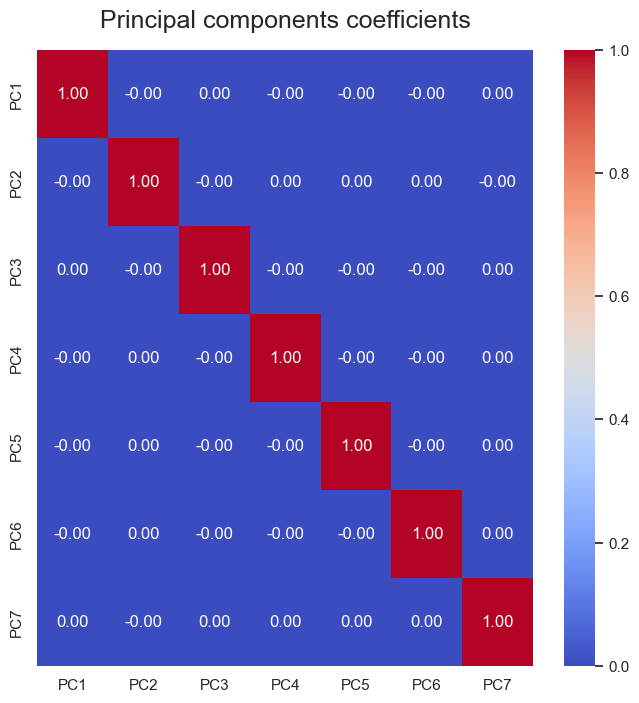

In [32]:
# Plotting correlation coefficient X_projected
import seaborn as sns
heatmap=sns.heatmap(X_projected.corr(),annot=True, fmt=".2f", cmap='coolwarm')
heatmap.set_title('Principal components coefficients', fontdict={'fontsize':18}, pad=16);

We obtained non correlated PCA and at the same scale

In [33]:
pca.explained_variance_ratio_*100

array([35.69632775, 26.25092321, 18.8211143 ,  7.55774983,  5.71651194,
        3.95479372,  2.00257925])

In [34]:
100/7

14.285714285714286

d' apres le critere de Kaiser, on peut prendre tous les PCA qui ont une inertie de 14%. 

Ce choix garantie une tres bonne precision

On peut ainsi prendre les 3 premiers PCA

In [37]:
df_pca =pd.DataFrame(X_projected,columns=['PC'+str(i+1) for i in range(0, 3)])
df_pca.head(4)

,PC1,PC2,PC3
0,2.514746,0.834122,2.174806
1,0.344935,0.598146,-2.211603
2,-0.651063,-0.680093,2.280419
3,1.714316,-0.579927,0.730731


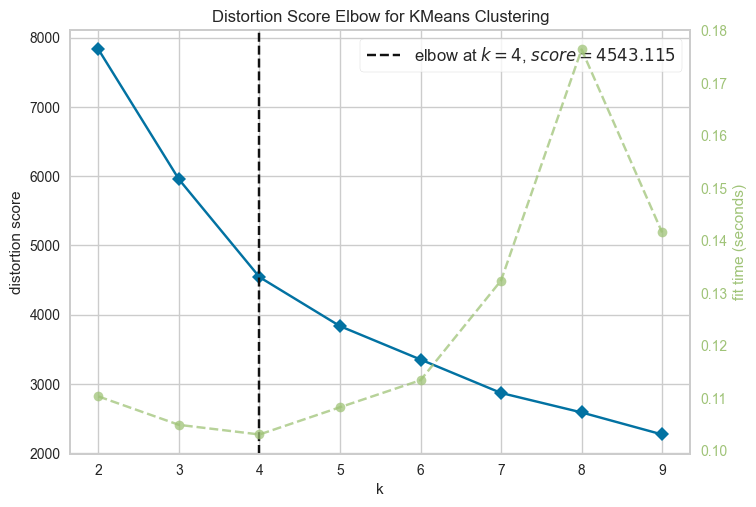

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df_pca)        
visualizer.show()  

According to the Elbow method, we have a optimal value of 4 

In [40]:
n_clusters=4
data['cluster'] = KMeans(n_clusters).fit(X_pca).labels_ 
data.head(4)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,1
2,0,0,49,1,89210,0,0,3
3,0,0,45,1,171565,1,1,2


In [41]:
data.groupby('cluster').agg({'Sex':pd.Series.mode,
                           'Marital status':pd.Series.mode,
                           'Age':'mean','Education':pd.Series.mode,
                           'Income':'mean','Occupation':pd.Series.mode,
                          'Settlement size':pd.Series.mode})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster,,,,,,,
0,1,1,55.703422,2,158338.422053,1,1
1,1,1,28.963121,1,105759.119149,1,0
2,0,0,35.635088,1,141218.249123,1,2
3,0,0,35.577922,1,97859.852814,0,0


# CONCLUSION

Using clustering help to find a way to target people linked by some caracteristics. Our dataset can be divided in 6 or 4 groups (within PCA). The company just need to know what is the link and establish a strategy to target them.